In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
patient = pd.read_csv("patient.csv")
route = pd.read_csv("route.csv")
time = pd.read_csv("time.csv")

In [3]:
patient.shape


(5766, 14)

The dataset patient has 5766 observations and 14 columns

In [4]:
print(patient.columns)
patient.head()

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [5]:
patient = patient.rename(columns = {"birth_year":"age"})
patient['age'] = 2020 - patient['age']

In [6]:
patient

,id,sex,age,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,36.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,56.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,54.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,56.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,33.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5762,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5762,5763,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5763,5764,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5764,5765,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated


In [7]:
patient_nat = patient.groupby("confirmed_date").size()
patient.groupby("country").size()

country
China          8
Korea       5756
Mongolia       1
dtype: int64

In [8]:
def patient_nationalities(data):
    data_grouped = patient.groupby("country").size()
    # get nationalities into a list
    nationalities = data_grouped.keys()
    total_count = 0 
    for item in range(len(data_grouped)):
        print("There are {} patients with nationalities from {}.".format(data_grouped[item], 
                                                                       nationalities[item]))
        total_count = total_count + data_grouped[item]
    print("There are {} patients with an unknown nationality.".format(len(data) - total_count))

In [9]:
patient_nationalities(patient)

There are 8 patients with nationalities from China.
There are 5756 patients with nationalities from Korea.
There are 1 patients with nationalities from Mongolia.
There are 1 patients with an unknown nationality.


In [34]:
'asdf' != int or float 

True

In [65]:
def bar_plot(data, feat_indicator):
    
    # created if statements so that feature_
    if type(feat_indicator) != str:
        feature = data.columns[feat_indicator]
        
    else: 
        if feat_indicator in data.columns:
            feature = feat_indicator
        else:
            return("Feature name not in the dataset.")
        
    
    grouped_data = data.groupby("{}".format(feature)).size()
    
    fig = plt.figure()
    groups = grouped_data.keys()
    num_people = grouped_data
    ax = fig.add_axes([0,0,1,1]) # [left, bottom, width, height] 
    ax.bar(groups,num_people)
    plt.xlabel("{}".format(feature), fontsize = 15)
    plt.xticks(rotation = 90)
    plt.ylabel("Number of People", fontsize = 15)
    plt.title("Numer of People by {}".format(feature), fontsize = 20)
    plt.show()

    

In [41]:
patient.columns

Index(['id', 'sex', 'age', 'country', 'region', 'group', 'infection_reason',
       'infection_order', 'infected_by', 'contact_number', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

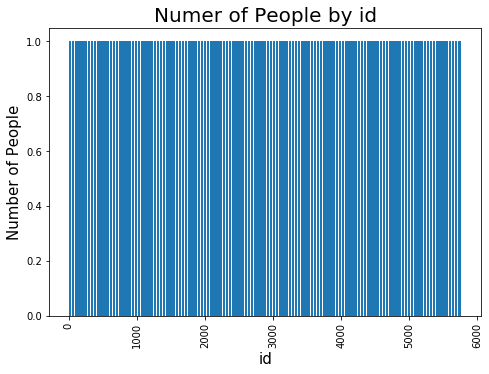

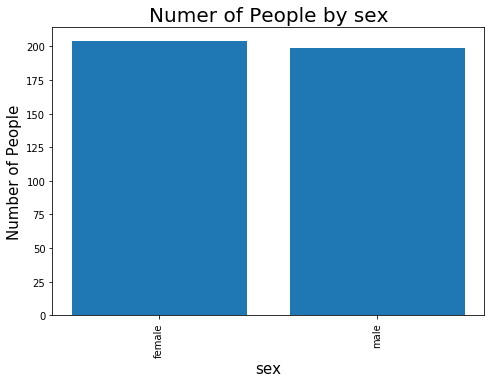

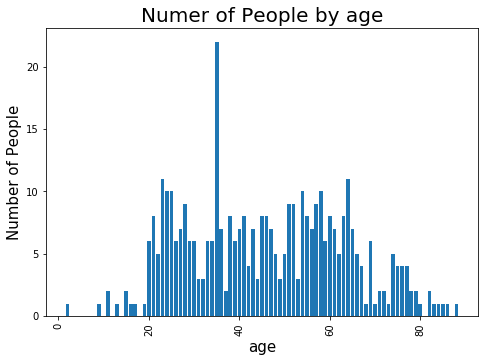

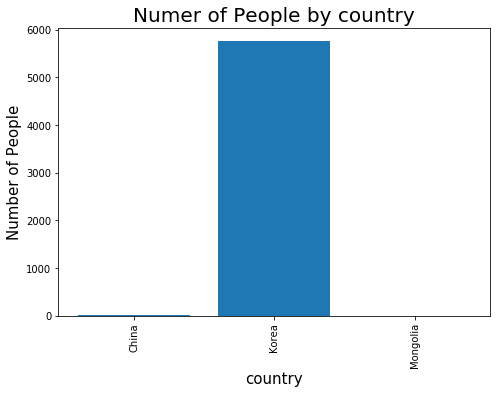

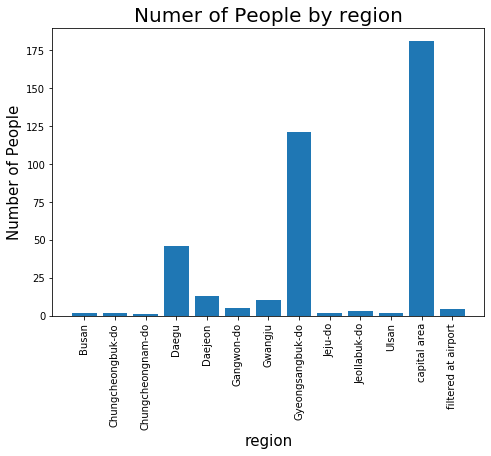

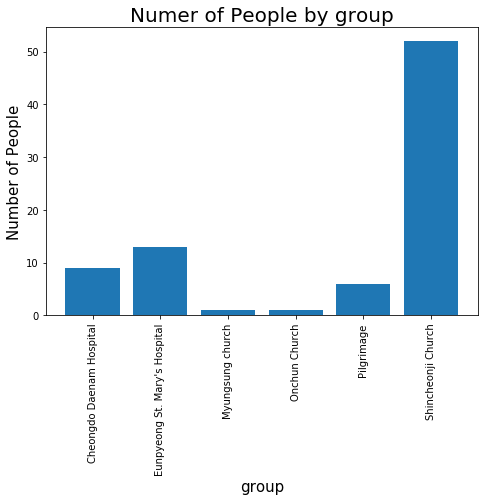

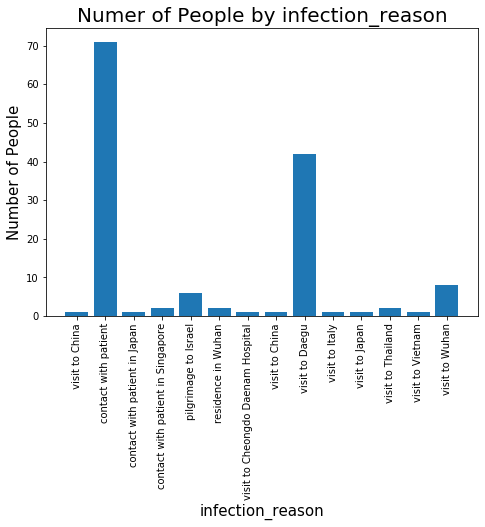

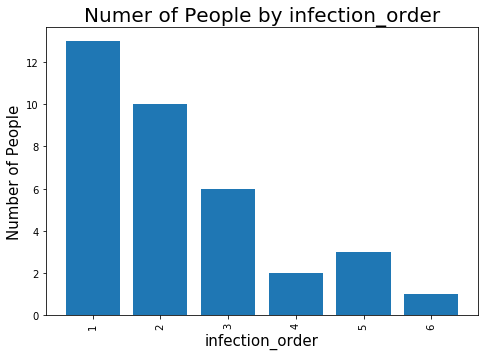

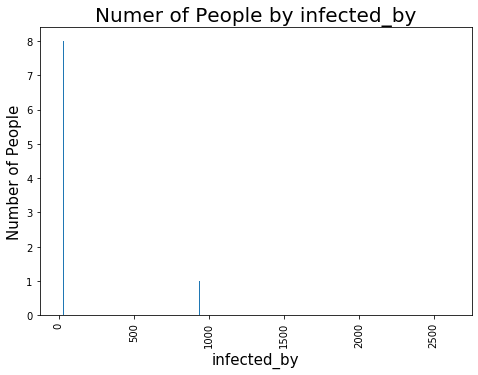

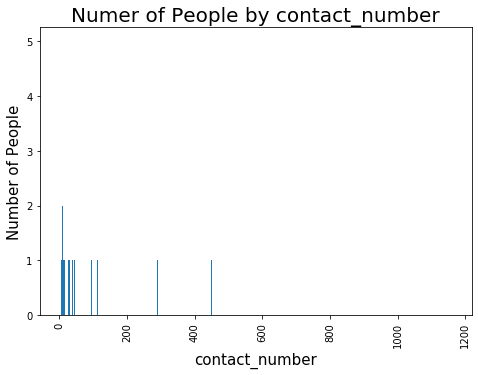

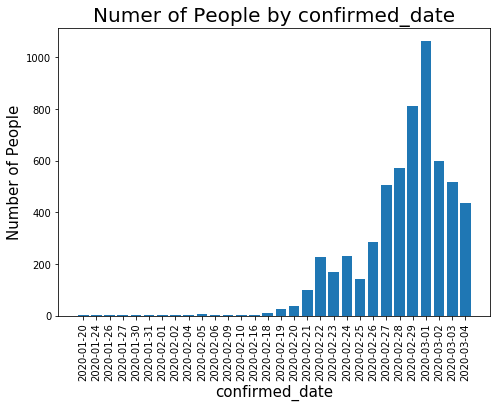

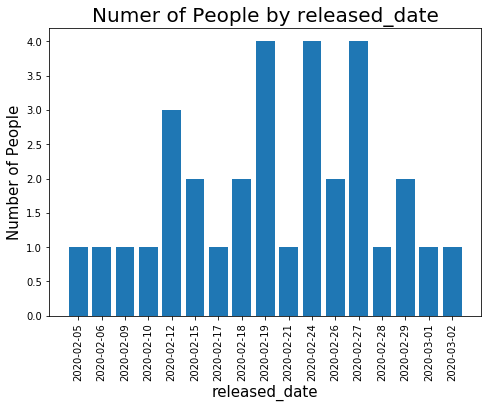

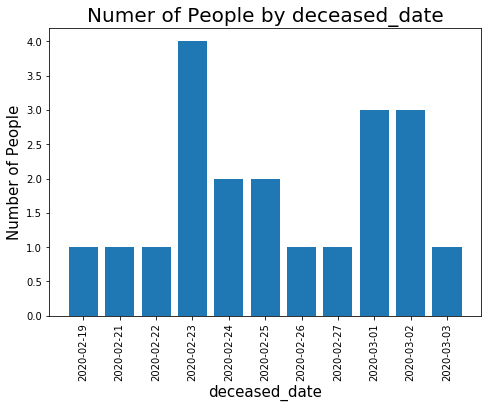

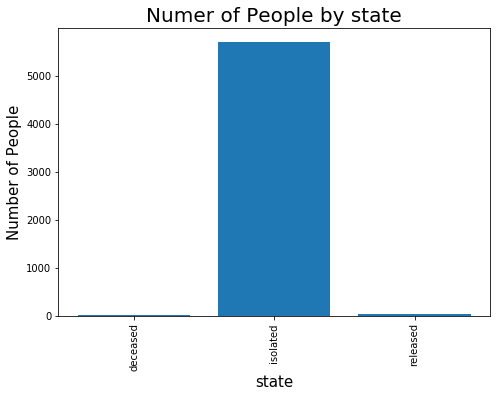

In [66]:
# not every plot is useful but its good to know method
for col in patient.columns:
    bar_plot(patient, col)

In [ ]:
patient.apply(lambda x: x.isna().sum(), axis = 0)
# for df patient look at every column (axis = 0) and count the number of observations that are na

We see is one observation in 3 columns that have only 1 NaN value. Let's investigate if one observations is responsible for this.

In [ ]:
my_list = []
counter = 0 
for row in patient['country'].isnull():
    if row == True:
        my_list.append(counter)
    counter += 1
my_list

In [ ]:
patient.iloc[102]

We see paitent with id 103 is responsible for one NaN value in country, confirmed_date, and state. 

Country, confirmed_date, and state are the only features where the majority of the data is not NaN. Therefore we will perform some further invegations on these.

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

# ts = ts.cumsum()

# ts.plot()
ts.plot()

In [ ]:
fig = plt.figure()
dates = patient.confirmed_date

### may want to look into making a column to see how long people were kept before being released.....
###   which is the number of days between the date confirmed and date release